## BIBLIOTECAS

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
print(sklearn.__version__)
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

1.5.0


In [8]:
#importar DF
df_tryhard = pd.read_csv('C:/Users/Ani/Desktop/BVNNY/Master/TFM/Datasets/df_final.csv', sep=',')
df_tryhard.head()

,Especie_planta,Toxic_Yes,Conocimiento_sobre_plantas_enc,Tiempo_de_dedicacion_enc,Clima_No_Seco,Tonos_Cálidos,Tonos_Fríos,Tonos_Me es indiferente,Vivienda_Adosado,Vivienda_Apartamento,Vivienda_Chalet,Dificultad,Ubicación,Estatura,Frecuencia_Riego,Tolera_mediterráneo_seco,Adecuado_para_mascotas,Sensación
0,Costilla de Adán,0.0,1.0,1.0,1,0,1,0,0,0,1,2,0,2,2,0,0,1
1,Costilla de Adán,1.0,1.0,2.0,1,0,1,0,1,0,0,2,0,2,2,0,0,1
2,Costilla de Adán,1.0,1.0,1.0,1,0,0,1,0,1,0,2,0,2,2,0,0,1
3,Costilla de Adán,0.0,1.0,1.0,0,1,0,0,0,1,0,2,0,2,2,0,0,1
4,Costilla de Adán,1.0,1.0,2.0,1,0,0,1,0,0,1,2,0,2,2,0,0,1


## Sistema de recomendación basado en contenidos que perfila a los usuarios

In [9]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Cargar el dataframe
df = df_tryhard

# Asegurarnos de que todas las columnas necesarias están presentes
expected_columns = [
    'Especie_planta', 'Toxic_Yes', 'Conocimiento_sobre_plantas_enc', 'Tiempo_de_dedicacion_enc', 
    'Clima_No_Seco', 'Tonos_Cálidos', 'Tonos_Fríos', 'Tonos_Me es indiferente', 
    'Vivienda_Adosado', 'Vivienda_Apartamento', 'Vivienda_Chalet', 'Dificultad', 
    'Ubicación', 'Estatura', 'Frecuencia_Riego', 'Tolera_mediterráneo_seco', 
    'Adecuado_para_mascotas', 'Sensación'
]
assert all(column in df.columns for column in expected_columns), "Faltan algunas columnas esperadas en el dataframe."

# Separar las características de las plantas y la columna de 'Sensación'
plant_features = df.drop(columns=['Especie_planta', 'Sensación'])
user_preferences = df[['Especie_planta', 'Sensación']]

# Escalar las características de las plantas entre 0 y 1
scaler = MinMaxScaler()
plant_features_scaled = scaler.fit_transform(plant_features)

# Crear un dataframe con las características escaladas
plant_features_scaled_df = pd.DataFrame(plant_features_scaled, columns=plant_features.columns)

# Crear el perfil del usuario basándonos en las plantas que le han gustado
user_profile = plant_features_scaled_df[user_preferences['Sensación'] == 1].mean()

# Calcular la similitud coseno entre el perfil del usuario y todas las plantas
cosine_similarities = cosine_similarity([user_profile], plant_features_scaled_df)

# Crear un dataframe con los resultados de similitud
similarity_df = pd.DataFrame(cosine_similarities.T, index=df['Especie_planta'], columns=['similarity'])

# Ordenar por similitud en orden descendente
recommendations = similarity_df.sort_values(by='similarity', ascending=False)

# Mostrar las recomendaciones
print(recommendations)


                similarity
Especie_planta            
Lavanda           0.889440
Lavanda           0.889440
Hiedra inglesa    0.888754
Hiedra inglesa    0.888754
Hiedra inglesa    0.888754
...                    ...
Haworthia         0.429994
Kalanchoe         0.417611
Cactus de jade    0.414848
Aloe vera         0.413140
Haworthia         0.399734

[1295 rows x 1 columns]


In [12]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Cargar el dataframe
df = df_tryhard
# Asegurarnos de que todas las columnas necesarias están presentes
expected_columns = [
    'Especie_planta', 'Toxic_Yes', 'Conocimiento_sobre_plantas_enc', 'Tiempo_de_dedicacion_enc', 
    'Clima_No_Seco', 'Tonos_Cálidos', 'Tonos_Fríos', 'Tonos_Me es indiferente', 
    'Vivienda_Adosado', 'Vivienda_Apartamento', 'Vivienda_Chalet', 'Dificultad', 
    'Ubicación', 'Estatura', 'Frecuencia_Riego', 'Tolera_mediterráneo_seco', 
    'Adecuado_para_mascotas', 'Sensación'
]
assert all(column in df.columns for column in expected_columns), "Faltan algunas columnas esperadas en el dataframe."

# Eliminar duplicados para evitar resultados redundantes
df = df.drop_duplicates()

# Separar las características de las plantas y la columna de 'Sensación'
plant_features = df.drop(columns=['Especie_planta', 'Sensación'])
user_preferences = df[['Especie_planta', 'Sensación']]

# Escalar las características de las plantas entre 0 y 1
scaler = MinMaxScaler()
plant_features_scaled = scaler.fit_transform(plant_features)

# Crear un dataframe con las características escaladas
plant_features_scaled_df = pd.DataFrame(plant_features_scaled, columns=plant_features.columns)

# Alinear los índices del dataframe escalado y las preferencias del usuario
user_preferences = user_preferences.reset_index(drop=True)
plant_features_scaled_df = plant_features_scaled_df.reset_index(drop=True)

# Crear el perfil del usuario basándonos en las plantas que le han gustado
user_profile = plant_features_scaled_df[user_preferences['Sensación'] == 1].mean()

# Calcular la similitud coseno entre el perfil del usuario y todas las plantas
cosine_similarities = cosine_similarity([user_profile], plant_features_scaled_df)

# Crear un dataframe con los resultados de similitud
similarity_df = pd.DataFrame(cosine_similarities.T, index=df['Especie_planta'], columns=['similarity'])

# Eliminar duplicados en la columna de especies de plantas
similarity_df = similarity_df[~similarity_df.index.duplicated(keep='first')]

# Ordenar por similitud en orden descendente
recommendations = similarity_df.sort_values(by='similarity', ascending=False)

# Mostrar las recomendaciones
print(recommendations)


                   similarity
Especie_planta               
Fucsia               0.837109
Hiedra inglesa       0.833082
Fittonia             0.771789
Violeta africana     0.762375
Hosta                0.736270
Lavanda              0.735840
Kalanchoe            0.733923
Philodendron         0.733904
Caléndula            0.726234
Aeonium              0.704165
Geranio              0.702938
Costilla de Adán     0.698545
Cactus de Navidad    0.684744
Nephthytis           0.684322
Palo de Brasil       0.674887
Helecho de Boston    0.663226
Cactus de jade       0.641987
Peperomia            0.639828
Aloe vera            0.589421
Haworthia            0.570981


In [18]:
from sklearn.metrics import precision_score, recall_score

# Supongamos que tienes un conjunto de prueba con plantas que el usuario ha marcado como gustadas o no gustadas
df_test = df_tryhard  # Asegúrate de tener un dataframe de prueba
test_user_preferences = df_test[['Especie_planta', 'Sensación']]

# Predecimos las preferencias del usuario basado en la similitud
# Para simplificar, asumimos que las plantas con similitud > 0.5 son recomendadas
recommended_plants = recommendations[recommendations['similarity'] > 0.5].index

# Verificamos si las plantas recomendadas están en las preferencias de prueba del usuario
y_true = test_user_preferences['Sensación']
y_pred = test_user_preferences['Especie_planta'].apply(lambda x: 1 if x in recommended_plants else 0)

# Calculamos precisión y recall para multiclase con zero_division=1
precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
recall = recall_score(y_true, y_pred, average='macro', zero_division=1)

print(f"Precisión: {precision}")
print(f"Recall: {recall}")

# Detalle de la precisión y recall por clase
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, zero_division=1))


Precisión: 0.879021879021879
Recall: 0.3333333333333333
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       367
           1       0.64      1.00      0.78       825
           2       1.00      0.00      0.00       103

    accuracy                           0.64      1295
   macro avg       0.88      0.33      0.26      1295
weighted avg       0.77      0.64      0.50      1295



In [20]:
#ajustando el umbral de similitud
# Ajustar el umbral de similitud
similarity_threshold = 0.6  # Prueba con diferentes valores como 0.4, 0.5, 0.6, etc.
recommended_plants = recommendations[recommendations['similarity'] > similarity_threshold].index

# Verificamos si las plantas recomendadas están en las preferencias de prueba del usuario
y_pred = test_user_preferences['Especie_planta'].apply(lambda x: 1 if x in recommended_plants else 0)

# Calculamos precisión y recall para multiclase con zero_division=1
precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
recall = recall_score(y_true, y_pred, average='macro', zero_division=1)

print(f"Precisión: {precision}")
print(f"Recall: {recall}")

# Detalle de la precisión y recall por clase
print(classification_report(y_true, y_pred, zero_division=1))


Precisión: 0.9205909510618652
Recall: 0.5258855585831063
              precision    recall  f1-score   support

           0       1.00      0.58      0.73       367
           1       0.76      1.00      0.86       825
           2       1.00      0.00      0.00       103

    accuracy                           0.80      1295
   macro avg       0.92      0.53      0.53      1295
weighted avg       0.85      0.80      0.76      1295



In [21]:
#ejemplo de Grid Search para Optimización de Hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Supongamos que estamos utilizando un modelo de regresión logística
model = LogisticRegression()

# Definimos los hiperparámetros a explorar
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Configuramos Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Ajustamos el modelo a los datos
grid_search.fit(plant_features_scaled_df, df['Sensación'])

# Mostramos los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenamos el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(plant_features_scaled_df, df['Sensación'])


Mejores hiperparámetros: {'C': 0.1, 'solver': 'saga'}


c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did 

LogisticRegression(C=0.1, solver='saga')

## Random Forest

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Preprocesamiento: Codificación de la variable categórica 'Especie_planta'
le = LabelEncoder()
df_tryhard['Especie_planta_encoded'] = le.fit_transform(df_tryhard['Especie_planta'])

# Definir el conjunto de características y la variable objetivo
X = df_tryhard.drop(columns=['Especie_planta', 'Especie_planta_encoded'])
y = df_tryhard['Especie_planta_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9653
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00         6
           7       0.53      0.90      0.67        10
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00         9
          12       0.00      0.00      0.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.

Accuracy: 0.9653
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00         6
           7       0.53      0.90      0.67        10
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00         9
          12       0.00      0.00      0.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.

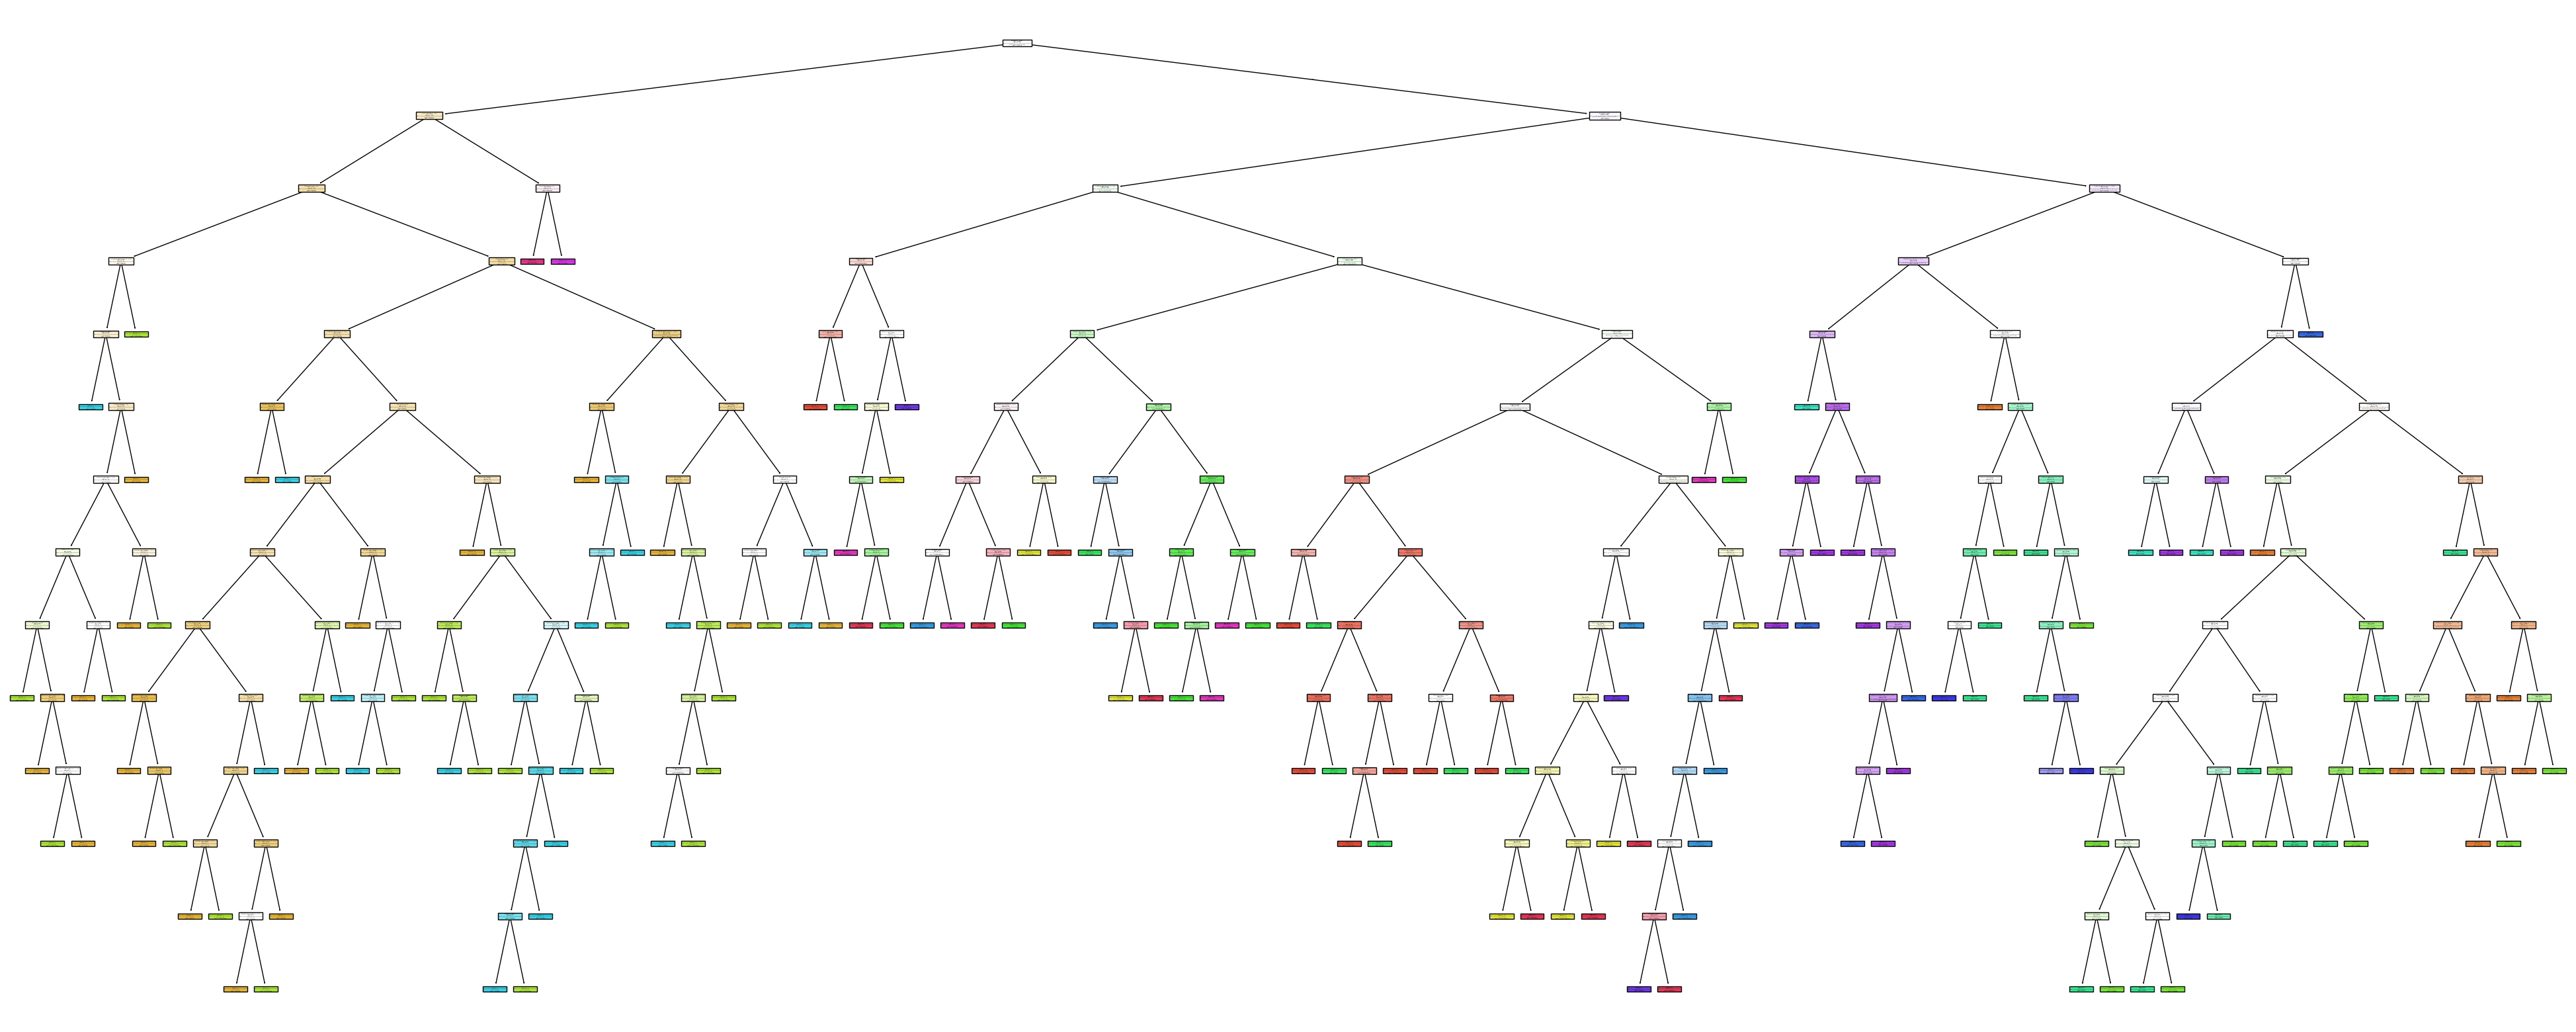

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Preprocesamiento: Codificación de la variable categórica 'Especie_planta'
le = LabelEncoder()
df_tryhard['Especie_planta_encoded'] = le.fit_transform(df_tryhard['Especie_planta'])

# Definir el conjunto de características y la variable objetivo
X = df_tryhard.drop(columns=['Especie_planta', 'Especie_planta_encoded'])
y = df_tryhard['Especie_planta_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar un solo árbol del bosque
plt.figure(figsize=(50,20))
plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()
